In [1]:
import matplotlib.pyplot as plt
import numpy as np

<img src="equations_article.png" width="450px" height="300px">
<img src="equations2_article.png" width="450px" height="300px">

In [2]:
# Parameters

# defaultclock.dt=0.1*ms # for better precision

b = {"e": 1.3, "i": 2.0}
thet = {"e": 4.0, "i": 3.7}
k = {"e": 0.9945, "i": 0.9994}

# tau doivent etre entre 10 et 20 ms
tau_cx = 10
tau_th = 10
tau_nrt = 10
tau_dcn = 10
tau_gpe = 10
tau_gpi = 10
tau_stn = 10

# Healthy state parameters
# w = [0, 20, 5, 8, 25, 15, 5, 19, 5, 15, 20, 20]

# w1 = 20
# w2 = 5
# w3 = 8
# w4 = 25
# w5 = 15
# w6 = 5
# w7 = 19
# w8 = 5
# w9 = 15
# w10 = 20
# w11 = 20
# ext = 3.42

# # Tremor band parameters
w = [0, 20, 12, 8, 9, 15, 5, 5, 5, 15, 20, 20]
# w1 = 20
# w2 = 12
# w3 = 8
# w4 = 9
# w5 = 15
# w6 = 5
# w7 = 5
# w8 = 5
# w9 = 15
# w10 = 20
# w11 = 20
# ext = 3.42

# # Beta band parameters
# w = [0, 20, 5, 8, 20, 15, 5, 5, 5, 15, 20, 20]
# w1 = 20
# w2 = 5
# w3 = 8
# w4 = 20
# w5 = 15
# w6 = 5
# w7 = 5
# w8 = 5
# w9 = 15
# w10 = 20
# w11 = 20
# ext = 3.42

In [3]:
# Z function

def Z(x,p):
    return (1 / (1 + np.exp(- b[p] * (x - thet[p])))) - (1 / (1 + np.exp(b[p] * thet[p])))


# %initialise network:
# x0=zeros(7,1);
# dt=1e-4;

# %run integrator:
# options=odeset('AbsTol',1.e-9,'RelTol',1.e-5);
# [T,Y]=ode23tb('function_Park',[0:dt:1],x0,options);




# Equations

# dE_cx/dt = (- E_cx + (k_e - E_cx) * Z_e(w1 * E_th)) / tau_cx : 1
# dE_th/dt = (- E_th + (k_e - E_th) * Z_e(w2 * E_cx - w3 * I_nrt + w4 * E_dcn - w5 * I_gpi)) / tau_th : 1
# dI_nrt/dt = (- I_nrt + (k_i - I_nrt) * Z_i(w6 * E_cx)) / tau_nrt : 1
# dE_dcn/dt = (- E_dcn + (k_e - E_dcn) * Z_e(ext)) / tau_dcn : 1
# dI_gpe/dt = (- I_gpe + (k_i - I_gpe) * Z_i(w7 * E_stn - w8 * I_gpe)) / tau_gpe : 1
# dI_gpi/dt = (- I_gpi + (k_i - I_gpi) * Z_i(w9 * E_stn)) / tau_gpi : 1
# dE_stn/dt = (- E_stn + (k_e - E_stn) * Z_e(w10 * E_cx - w11 * I_gpe)) / tau_stn : 1

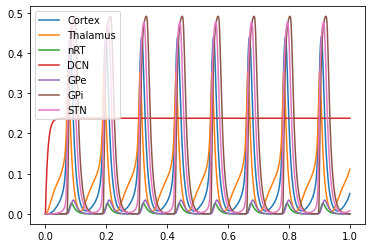

In [4]:
from scipy.integrate import odeint, solve_ivp

temps = np.arange(0, 1, 0.0001)
Y0 = [0, 0, 0, 0, 0, 0, 0]


# %Parameters for gamma oscillation
ext=3.42;
tau=0.010;
e1=np.exp(5.2);
e2=np.exp(7.4);

i = 'e'
e = 'i'
# L'équation différentielle sous forme de fonction

def equation(Y,temps):

    # Inputs and weights
    Cx=w[1]*Y[1]
    Th=w[2]*Y[0]-w[3]*Y[2]+w[4]*Y[3]-w[5]*Y[5]
    RT=w[6]*Y[0]
    DCN=ext
    GPe=w[7]*Y[6]-w[8]*Y[4]
    GPi=w[9]*Y[6]
    STN=w[10]*Y[0]-w[11]*Y[4]

    # Functions to solve
    dY1=(-Y[0]+(k[i]-Y[0])*Z(Cx, i))/tau
    dY2=(-Y[1]+(k[i]-Y[1])*Z(Th, i))/tau
    dY3=(-Y[2]+(k[e]-Y[2])*Z(RT, e))/tau
    dY4=(-Y[3]+(k[i]-Y[3])*Z(DCN, i))/tau
    dY5=(-Y[4]+(k[e]-Y[4])*Z(GPe, e))/tau
    dY6=(-Y[5]+(k[e]-Y[5])*Z(GPi, e))/tau
    dY7=(-Y[6]+(k[i]-Y[6])*Z(STN, i))/tau
    
    # On renvoie ce que vaut Y' :
    return [dY1, dY2, dY3, dY4, dY5, dY6, dY7]

# Pour que odeint renvoit séparément les valeurs de Y et de Y', il faut rajouter .T à la fin
Y=odeint(equation, Y0, temps)
plt.plot(temps,Y)
plt.legend(['Cortex','Thalamus','nRT','DCN','GPe','GPi','STN'])
plt.show()

In [5]:
ki = 1/(1/np.exp(7.4)+1) # 0.9993891206405656
ke = 1/(1/np.exp(5.2)+1) # 0.9945137011005495

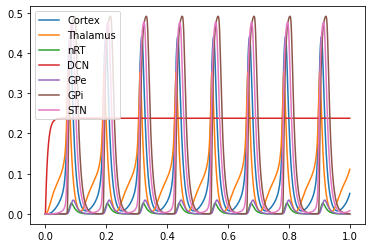

In [6]:
def equation2(temps, Y):

    # Inputs and weights
    Cx=w[1]*Y[1]
    Th=w[2]*Y[0]-w[3]*Y[2]+w[4]*Y[3]-w[5]*Y[5]
    RT=w[6]*Y[0]
    DCN=ext
    GPe=w[7]*Y[6]-w[8]*Y[4]
    GPi=w[9]*Y[6]
    STN=w[10]*Y[0]-w[11]*Y[4]

    # Functions to solve
    dY1=(-Y[0]+(k[i]-Y[0])*Z(Cx, i))/tau
    dY2=(-Y[1]+(k[i]-Y[1])*Z(Th, i))/tau
    dY3=(-Y[2]+(k[e]-Y[2])*Z(RT, e))/tau
    dY4=(-Y[3]+(k[i]-Y[3])*Z(DCN, i))/tau
    dY5=(-Y[4]+(k[e]-Y[4])*Z(GPe, e))/tau
    dY6=(-Y[5]+(k[e]-Y[5])*Z(GPi, e))/tau
    dY7=(-Y[6]+(k[i]-Y[6])*Z(STN, i))/tau
    
    # On renvoie ce que vaut Y' :
    return [dY1, dY2, dY3, dY4, dY5, dY6, dY7]
atol = 1.e-9
rtol = 1.e-5


# Pour que odeint renvoit séparément les valeurs de Y et de Y', il faut rajouter .T à la fin
sol=solve_ivp(equation2, [0,1], Y0, t_eval=temps, method='BDF', atol=atol, rtol=rtol)
plt.plot(temps,sol.y.T)
plt.legend(['Cortex','Thalamus','nRT','DCN','GPe','GPi','STN'])
plt.show()

In [7]:
#     # Functions to solve
#     dY[1]=(-Y[1]+(ki-Y[1])*(1/(1+exp(7.4-2*Cx))-1/(1+e2)))/tau
#     dY[2]=(-Y[2]+(ki-Y[2])*(1/(1+exp(7.4-2*Th))-1/(1+e2)))/tau
#     dY[3]=(-Y[3]+(ke-Y[3])*(1/(1+exp(5.2-1.3*RT))-1/(1+e1)))/tau
#     dY[4]=(-Y[4]+(ki-Y[4])*(1/(1+exp(7.4-2*DCN))-1/(1+e2)))/tau
#     dY[5]=(-Y[5]+(ke-Y[5])*(1/(1+exp(5.2-1.3*GPe))-1/(1+e1)))/tau
#     dY[6]=(-Y[6]+(ke-Y[6])*(1/(1+exp(5.2-1.3*GPi))-1/(1+e1)))/tau
#     dY[7]=(-Y[7]+(ki-Y[7])*(1/(1+exp(7.4-2*STN))-1/(1+e2)))/tau

<img src="equations3_article.png" width="450px" height="300px">

In [8]:
### DBS Signal

def sigma_sum_odd(start, end, t, expression):
    return sum(expression(n,t) for n in range(start, end+2, 2))


def DBS(n, t):
    return A*(4/np.pi)*((1/n)*np.sin(2*np.pi*n*f*t))

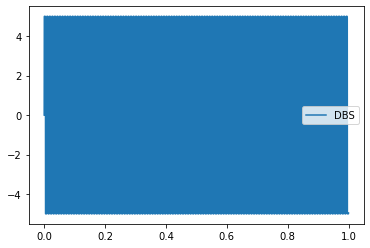

In [18]:
# DBS parameters
A = 5
f = 120
dbs = sigma_sum_odd(1, 1001, temps, DBS)
plt.plot(temps, dbs)
plt.legend(['DBS'])
plt.show()

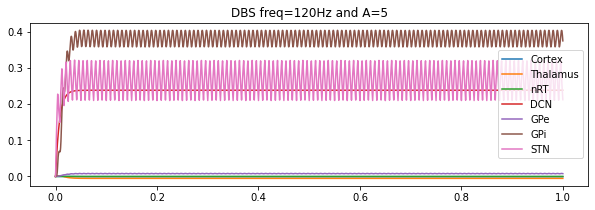

In [19]:
def equation_DBS(temps, Y):

    # Inputs and weights
    Cx=w[1]*Y[1]
    Th=w[2]*Y[0]-w[3]*Y[2]+w[4]*Y[3]-w[5]*Y[5]
    RT=w[6]*Y[0]
    DCN=ext
    GPe=w[7]*Y[6]-w[8]*Y[4]
    GPi=w[9]*Y[6]
    STN=w[10]*Y[0]-w[11]*Y[4]+sigma_sum_odd(1, 1001, temps, DBS)

    # Functions to solve
    dY1=(-Y[0]+(k[i]-Y[0])*Z(Cx, i))/tau
    dY2=(-Y[1]+(k[i]-Y[1])*Z(Th, i))/tau
    dY3=(-Y[2]+(k[e]-Y[2])*Z(RT, e))/tau
    dY4=(-Y[3]+(k[i]-Y[3])*Z(DCN, i))/tau
    dY5=(-Y[4]+(k[e]-Y[4])*Z(GPe, e))/tau
    dY6=(-Y[5]+(k[e]-Y[5])*Z(GPi, e))/tau
    dY7=(-Y[6]+(k[i]-Y[6])*Z(STN, i))/tau
    
    # On renvoie ce que vaut Y' :
    return [dY1, dY2, dY3, dY4, dY5, dY6, dY7]
atol = 1.e-9
rtol = 1.e-5


# Pour que odeint renvoit séparément les valeurs de Y et de Y', il faut rajouter .T à la fin
sol=solve_ivp(equation_DBS, [0,1], Y0, t_eval=temps, method='RK23', atol=atol, rtol=rtol)
fig,ax=plt.subplots(figsize=(10,3))
ax.plot(temps,sol.y.T)
ax.legend(['Cortex','Thalamus','nRT','DCN','GPe','GPi','STN'])
plt.title(f"DBS freq={f}Hz and A={A}")
plt.show()